# DCT and IDCT

Date: 2023/10/14

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct
import glob

In [2]:
%matplotlib inline

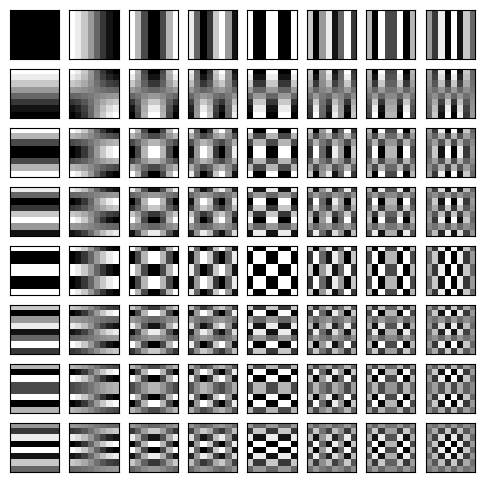

In [3]:
fig, axes = plt.subplots(8,8, figsize=(6,6))
patterns = np.zeros([8,8,8,8])
for i in range(8):  # vertical
    for j in range(8):  # horizontal
        dcted = np.zeros([8,8])
        dcted[i, j] = 1
        img = idct(idct(dcted, norm='ortho').T, norm='ortho').T
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].imshow(img, cmap='gray')
        patterns[i,j,:,:] = img
        np.savetxt('dct_patterns/P-{}-{}.csv'.format(i,j), img.flatten(), delimiter=",")

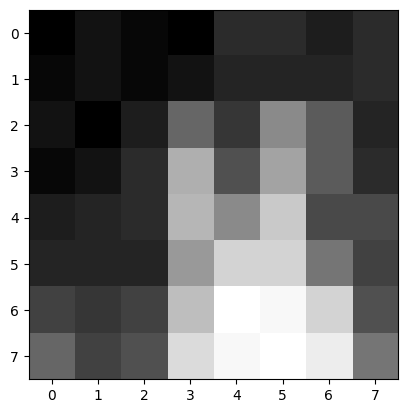

In [4]:
data = np.array([[26.8, 25.8, 26.2, 30., 30.8, 31., 30.5, 27.2],
 [25.8, 25.5, 25.8, 29.2, 31.,  30.8, 29.8, 26.2],
 [25.,  25.,  25.,  28.2, 29.8, 29.8, 27.2, 25.8],
 [24.8, 25.,  25.2, 29.,  27.8, 29.5, 26.,  26.],
 [24.2, 24.5, 25.2, 28.8, 26.2, 28.5, 26.5, 25.2],
 [24.5, 24.,  24.8, 26.8, 25.5, 27.8, 26.5, 25. ],
 [24.2, 24.5, 24.2, 24.5, 25.,  25.,  25.,  25.2],
 [24.,  24.5, 24.2, 24.,  25.2, 25.2, 24.8, 25.2]])
data = data[::-1]
plt.imshow(data, cmap='gray')

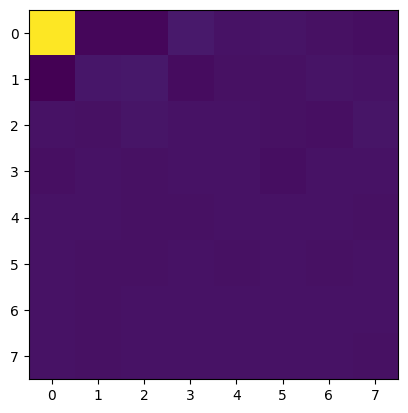

In [5]:
dcted_data = dct(dct(data, norm='ortho').T, norm='ortho').T
plt.imshow(dcted_data, cmap='viridis')

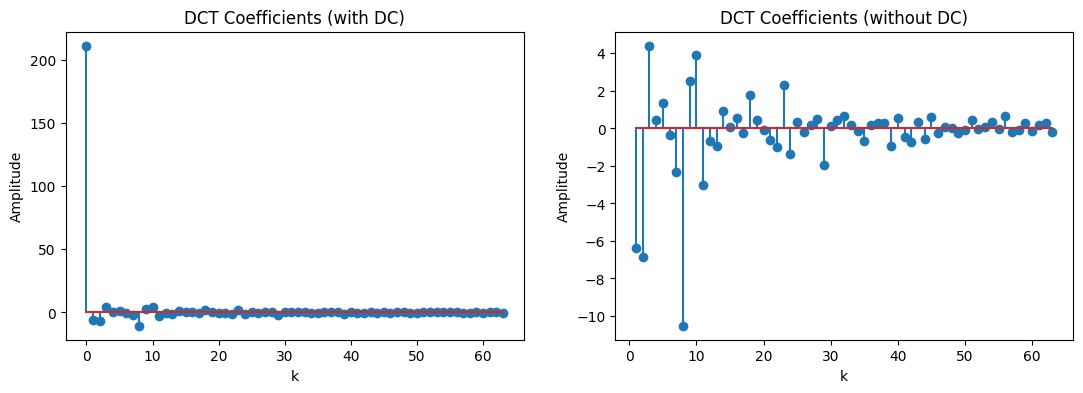

In [6]:
fig, ax = plt.subplots(1,2,figsize=(13,4))
ax[0].stem(dcted_data.flatten())
ax[0].set_title('DCT Coefficients (with DC)')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Amplitude')
ax[1].stem(np.arange(1,64), dcted_data.flatten()[1:])
ax[1].set_title('DCT Coefficients (without DC)')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Amplitude')
plt.show()

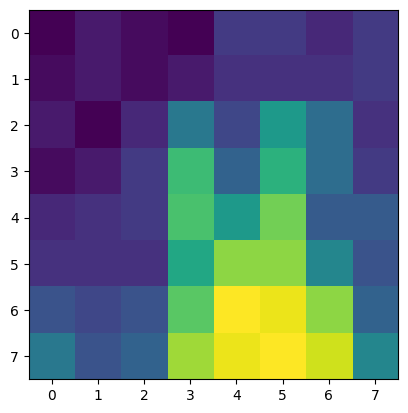

In [7]:
idcted_data = np.zeros([8,8])
for x in range(8):
    for y in range(8):
        idcted_data += dcted_data[x,y] * patterns[x,y]
plt.imshow(idcted_data, cmap='viridis')

In [8]:
ZIGZAG = [[0,0],\
          [0,1],\
          [1,0], [2,0],\
          [1,1], [0,2], [0,3],\
          [1,2], [2,1], [3,0], [4,0],\
          [3,1], [2,2], [1,3], [0,4], [0,5],\
          [1,4], [2,3], [3,2], [4,1], [5,0],\
          [6,0], [5,1], [4,2], [3,3], [2,4], [1,5], [0,6],\
          [0,7], [1,6], [2,5], [3,4], [4,3], [5,2], [6,1], [7,0],
          [7,1], [6,2], [5,3], [4,4], [3,5], [2,6], [1,7],\
          [2,7], [3,6], [4,5], [5,4], [6,3], [7,2],\
          [7,3], [6,4], [5,5], [4,6], [3,7],\
          [4,7], [5,6], [6,5], [7,4],\
          [7,5], [6,6], [5,7],\
          [6,7], [7,6],\
          [7,7]]

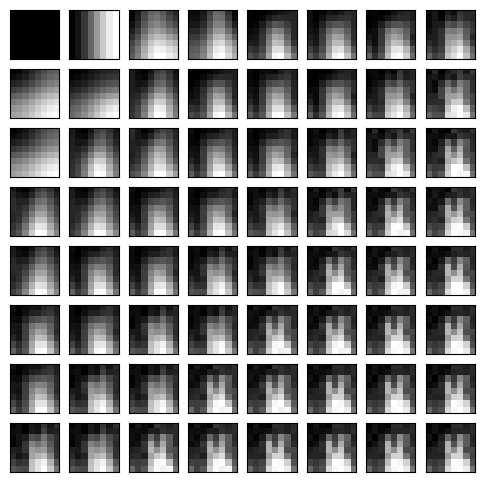

In [9]:
idcted_data = np.zeros([8,8])

fig, axes = plt.subplots(8,8, figsize=(6,6))
for i, j in ZIGZAG[:64]:
    idcted_data += dcted_data[i, j] * patterns[i, j]
    axes[i, j].imshow(idcted_data, cmap='gray')
for i in range(8):
    for j in range(8):
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

In [10]:
data

array([[24. , 24.5, 24.2, 24. , 25.2, 25.2, 24.8, 25.2],
       [24.2, 24.5, 24.2, 24.5, 25. , 25. , 25. , 25.2],
       [24.5, 24. , 24.8, 26.8, 25.5, 27.8, 26.5, 25. ],
       [24.2, 24.5, 25.2, 28.8, 26.2, 28.5, 26.5, 25.2],
       [24.8, 25. , 25.2, 29. , 27.8, 29.5, 26. , 26. ],
       [25. , 25. , 25. , 28.2, 29.8, 29.8, 27.2, 25.8],
       [25.8, 25.5, 25.8, 29.2, 31. , 30.8, 29.8, 26.2],
       [26.8, 25.8, 26.2, 30. , 30.8, 31. , 30.5, 27.2]])

In [11]:
idcted_data

array([[24. , 24.5, 24.2, 24. , 25.2, 25.2, 24.8, 25.2],
       [24.2, 24.5, 24.2, 24.5, 25. , 25. , 25. , 25.2],
       [24.5, 24. , 24.8, 26.8, 25.5, 27.8, 26.5, 25. ],
       [24.2, 24.5, 25.2, 28.8, 26.2, 28.5, 26.5, 25.2],
       [24.8, 25. , 25.2, 29. , 27.8, 29.5, 26. , 26. ],
       [25. , 25. , 25. , 28.2, 29.8, 29.8, 27.2, 25.8],
       [25.8, 25.5, 25.8, 29.2, 31. , 30.8, 29.8, 26.2],
       [26.8, 25.8, 26.2, 30. , 30.8, 31. , 30.5, 27.2]])

In [12]:
np.allclose(data, idcted_data)

True